# 素数判定あれこれ

In [1]:
import math
import matplotlib.pyplot as plt
%matplotlib inline
from sympy import *
from tqdm.notebook import tqdm
from decimal import *
getcontext()
from functools import reduce

## 素朴な素数判定

In [2]:
def is_prime(num):
    for k in range(2, int(math.sqrt(num))+1):
        if num%k == 0:
            return False
            break
    else: return True

In [3]:
is_prime(4)

False

In [4]:
%timeit is_prime(2**31-1)

100 loops, best of 3: 6.21 ms per loop


In [5]:
N=20
nlist = [(i,is_prime(i)) for i in range(2,N)]
print(nlist)

[(2, True), (3, True), (4, False), (5, True), (6, False), (7, True), (8, False), (9, False), (10, False), (11, True), (12, False), (13, True), (14, False), (15, False), (16, False), (17, True), (18, False), (19, True)]


## 素数の個数

In [6]:
Num = 3000
checklist = [(k, is_prime(k)) for k in range(2, Num+1)]

plist = [n[0] for n in checklist if n[1]] #= list(filter(lambda x: x[1], checklist))
print("There are {} prime numbers up to {}".format(len(plist), Num))

There are 430 prime numbers up to 3000


## 素数定理

In [7]:
Num = 10000*3
plist = [k for k in range(2, Num+1) if is_prime(k)]
#print(plist)

In [8]:
bp_n = range(5,Num+1)
'''
bp_p = []
for n in bp_n:
#    n までの素数の個数を勘定して、bp_p に加える。
    plist = [i for i in range(2, n+1) if is_prime(i)]
    bp_p.append(len(plist))
'''
bp_p = []
for n in bp_n:
    kosuu = len([p for p in plist if p <= n])
    bp_p.append(kosuu)

bp_y = [x/(math.log(x)-1.1*0) for x in bp_n]

#print(bp_p)

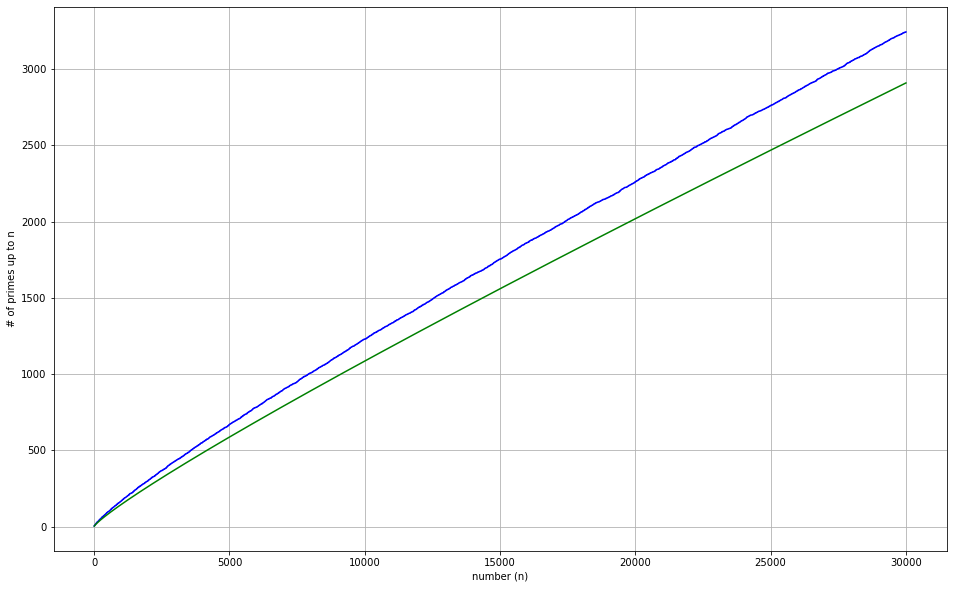

In [9]:
# Make the plot
plt.figure(figsize=(16,10))

ax = plt.subplot()
ax.grid()
ax.set(xlabel='number (n)', ylabel='# of primes up to n')

plt.plot(bp_n, bp_p, color='blue')
plt.plot(bp_n, bp_y, color='green')
plt.show()

# 素数判定の高速化

In [10]:
%%timeit
Num = 10**5
checklist = [(k, is_prime(k)) for k in range(2, Num+1)]

plist = [n[0] for n in checklist if n[1]] #= list(filter(lambda x: x[1], checklist))
# print("There are {} prime numbers up to {}".format(len(plist), Num))

1 loop, best of 3: 287 ms per loop


In [11]:
Num = 10**4
%timeit nlist=[k for k in range(2,Num+1) if k%3 == 0]
%timeit num = 5; nlist = [num*k for k in range(1,int(Num/num)+1)]

1000 loops, best of 3: 856 µs per loop
10000 loops, best of 3: 164 µs per loop


In [12]:
def find_factor_01(num):
    mx = int(math.sqrt(num))    
    count = 0
    for k in range(2, mx+1):
        count += 1
        if num%k==0: print(k)
            
def find_factor_02(num):
    mx = int(math.sqrt(num))
    composites = []
    for k in range(2, mx+1):
        if k not in composites:
            if num%k==0: print(k)
            else: composites.extend([k*i for i in range(2, int(mx/k)+1)])
                
def find_factor_03(num):
    nlist = list(range(2, int(math.sqrt(num))+1))
    while nlist:
        mm = nlist.pop(0)
        res = num%mm
        if res == 0:
            print(mm)
            break
        else:
            nlist = [k for k in nlist if k%mm > 0]

In [13]:
%load_ext line_profiler

ModuleNotFoundError: No module named 'line_profiler'

In [14]:
num = 2**31-1
%lprun -f find_factor_02 find_factor_02(num)

UsageError: Line magic function `%lprun` not found.


```
Timer unit: 1e-06 s

Total time: 16.8452 s
File: <ipython-input-6-02803966a958>
Function: find_factor_02 at line 8

Line #      Hits         Time  Per Hit   % Time  Line Contents
==============================================================
     8                                           def find_factor_02(num):
     9         1          8.0      8.0      0.0      mx = int(math.sqrt(num))
    10         1          2.0      2.0      0.0      composites = []
    11     46340      38539.0      0.8      0.2      for k in range(2, mx+1):
    12     46339   16744590.0    361.3     99.4          if k not in composites:
    13      4792       8903.0      1.9      0.1              if num%k==0: print(k)
    14      4792      53194.0     11.1      0.3              else: composites.extend([k*i for i in range(2, int(mx/k)+1)])
```

# 素因数分解

In [12]:
num = (2**3)*(3**4)*5*(7**2)*17
print(num)

2698920


In [19]:
def find_the_smallest_factor(num):
    for k in range(2, int(math.sqrt(num))+1):
        if num%k == 0:
#            print("[{}, {}]".format(num,k), num)
            return k
            break
    else: return num

In [20]:
find_the_smallest_factor(num)

2

def 素因数分解(num):
    分解 = []
    while (num が 1 でない):
        素因数 = find_the_smallest_factor(num)
        分解.append(素因数)
        num = int(num/素因数)
    return 分解

In [21]:
def sbunkai(num):
    facs = []
    while num != 1:
        factor = find_the_smallest_factor(num)
        facs.append(factor)
#        print(facs)
        num = int(num//factor)
    return facs

In [22]:
num = (2**3)*(3**4)*5*(7**2)*17
sbunkai(num)

[2, 2, 2, 3, 3, 3, 3, 5, 7, 7, 17]

再帰的処理で素因数分解を実装

In [23]:
def factorisation(num, facs_list=None):
    if facs_list is None: 
        facs_list = []
    factor = find_the_smallest_factor(num)
    facs_list.append(factor)
    if factor != num:
        num = int(num//factor)
        facs_list = factorisation(num, facs_list)
    return facs_list

In [24]:
factorisation(num)

[2, 2, 2, 3, 3, 3, 3, 5, 7, 7, 17]

In [25]:
%timeit sbunkai(num)
%timeit factorisation(num)

10000 loops, best of 3: 16.5 µs per loop
100000 loops, best of 3: 18.3 µs per loop


In [26]:
p = 58
mp = 2**p-1


if is_prime(p): msg = "PRIME"
else: msg = "COMPOSIT"
    
print("{} is a {}".format(p, msg))

fact_str = '*'.join(map(str,factorisation(mp)))
print("2**{}-1={} is factorised to {}.".format(p,mp,fact_str))

58 is a COMPOSIT
2**58-1=288230376151711743 is factorised to 3*59*233*1103*2089*3033169.


In [27]:
import numpy as np

mlist = factorisation(mp)
np.prod(mlist)

288230376151711743